In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
training_data = pd.read_csv("../training data.csv")
training_data.head()

,PDB codes,VDWAALS 1,EEL 1,EGB 1,ESURF 1,GGAS 1,GSOLV 1,TOTAL 1,hbdist_mean1,hbdist_std1,...,GGAS 2,GSOLV 2,TOTAL 2,hbdist_mean2,hbdist_std2,hbnum_mean2,hbnum_std2,hbnum_mean_<.35_2,hbnum_std_<.35_2,Output
0,"4hj8 , 2la5",2.857144,6.346850,15.364635,2.727722,14.530470,15.364635,-113.49,-720.46,739.96,...,20.680320,18.000000,-89.04,-3797.32,3785.39,-12.50,-3886.36,3772.90,-113.46,0
1,"1osb , 2mki",2.857144,6.319618,87.585415,4.537219,65.985015,87.585415,-563.32,-11193.39,11154.77,...,11.741259,6.296703,-85.56,-260.76,305.67,-10.57,-346.32,295.11,-51.21,1
2,"5wzj , 1je8",2.857143,5.946841,31.663337,2.959525,40.330669,31.663337,-230.34,130.79,-82.34,...,26.929071,49.412587,-309.02,-25367.65,25386.51,-44.66,-25676.67,25341.85,-334.82,0
3,"3moj , 1wwd",2.857143,6.500905,13.814186,2.719199,18.559441,13.814186,-118.26,-7867.57,7908.33,...,9.180819,9.595405,-69.90,-995.71,1011.87,-8.73,-1065.60,1003.13,-62.47,1
4,"3rn2 , 2kx5",2.857141,7.035113,16.630370,2.416485,7.082917,16.630370,-79.85,-13297.79,13326.09,...,20.099900,13.930070,-90.79,-5001.44,5006.58,-12.27,-5092.23,4994.32,-97.91,0


In [76]:
def fisher_score(feature, target):

    mean_class1 = feature[target == 1].mean()
    mean_class0 = feature[target == 0].mean()
    var_class1 = feature[target == 1].var()
    var_class0 = feature[target == 0].var()
    
    score = (mean_class1 - mean_class0) ** 2 / (var_class1 + var_class0)
    return score

# Calculate Fisher Scores for each feature
scores = {str(col): fisher_score(training_data.iloc[:, col], training_data['Output']) for col in range(1, len(training_data.columns) - 1)}
print("Fisher Scores:", scores)

Fisher Scores: {'1': 0.0013098998944199697, '2': 0.01915099668716322, '3': 0.014017842023418735, '4': 0.04093317001720654, '5': 0.015006891102729155, '6': 0.014017842023418735, '7': 0.02713130437971518, '8': 0.0905444981814241, '9': 0.09057398993813111, '10': 0.03190155831131845, '11': 0.09133609722387324, '12': 0.09047662865304786, '13': 0.026623104151858017, '14': 0.0006208989877802745, '15': 0.016507850747902064, '16': 0.018655860417272407, '17': 0.04635205491130111, '18': 0.015584970592337082, '19': 0.018655860417272407, '20': 0.02727828672123019, '21': 0.0942506921728146, '22': 0.09421496452161399, '23': 0.03264892708448684, '24': 0.09510672213003707, '25': 0.09410532365840603, '26': 0.028211793958412845}


{'24': 0.09510672213003707, '21': 0.0942506921728146, '22': 0.09421496452161399, '25': 0.09410532365840603, '11': 0.09133609722387324, '9': 0.09057398993813111, '8': 0.0905444981814241, '12': 0.09047662865304786, '17': 0.04635205491130111, '4': 0.04093317001720654, '23': 0.03264892708448684, '10': 0.03190155831131845, '26': 0.028211793958412845, '20': 0.02727828672123019, '7': 0.02713130437971518, '13': 0.026623104151858017, '2': 0.01915099668716322, '16': 0.018655860417272407, '19': 0.018655860417272407, '15': 0.016507850747902064, '18': 0.015584970592337082, '5': 0.015006891102729155, '3': 0.014017842023418735, '6': 0.014017842023418735, '1': 0.0013098998944199697, '14': 0.0006208989877802745}


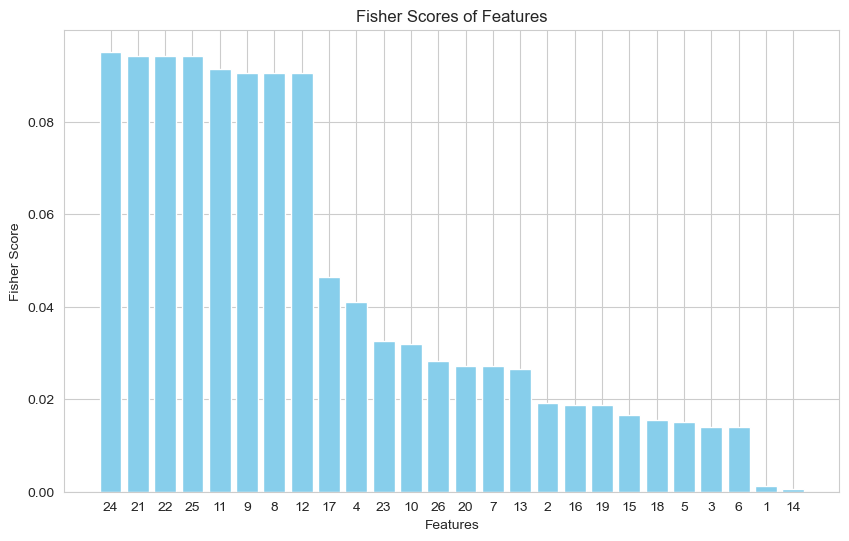

In [80]:
sorted_scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
print(sorted_scores)
plt.figure(figsize=(10, 6))
plt.bar(sorted_scores.keys(), sorted_scores.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Fisher Score')
plt.title('Fisher Scores of Features')
plt.show()

c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


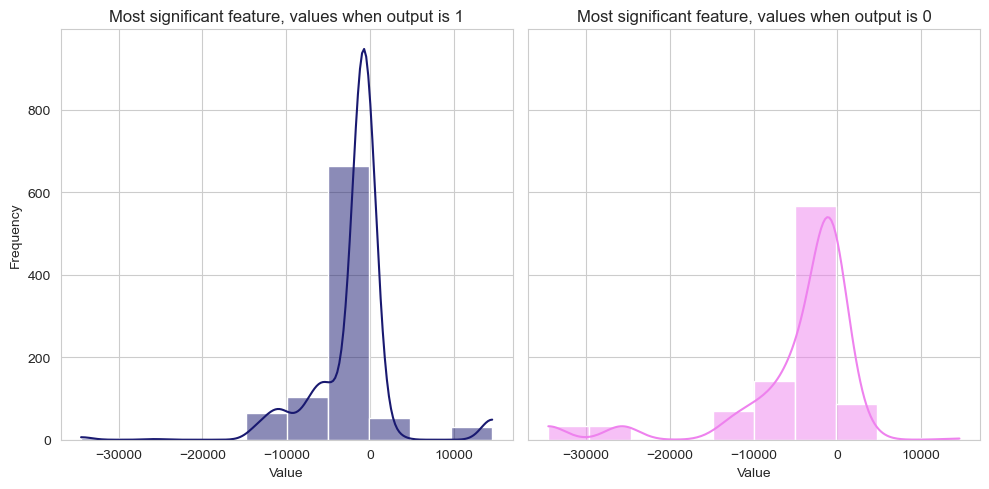

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
sns.set_style("whitegrid")
sns.histplot(data=training_data[training_data['Output'] == 1].iloc[:,24], ax = axs[0], bins=10, kde=True, color='midnightblue')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Most significant feature, values when output is 1')

sns.histplot(data=training_data[training_data['Output'] == 0].iloc[:,24], ax = axs[1], bins=10, kde=True, color='violet')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Most significant feature, values when output is 0')

plt.tight_layout()
plt.show()

c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


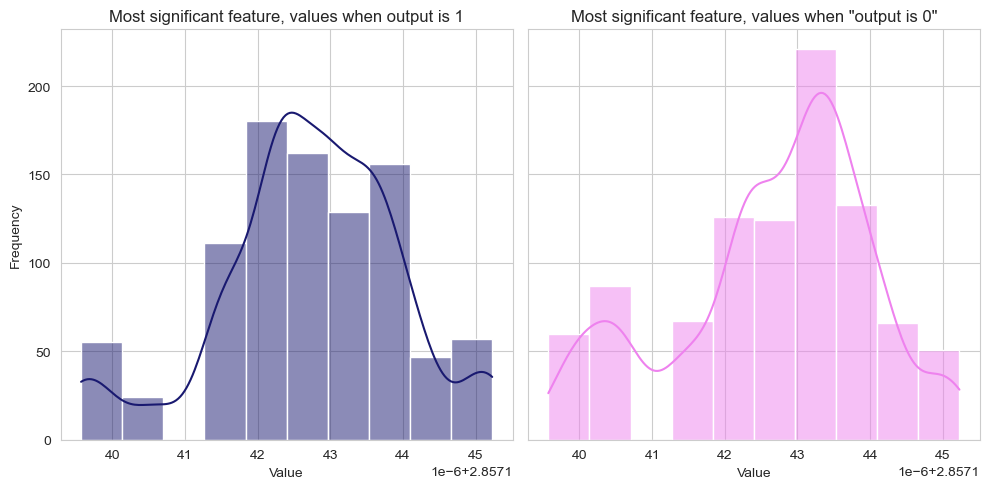

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
sns.set_style("whitegrid")
sns.histplot(data=training_data[training_data['Output'] == 1].iloc[:,14], ax = axs[0], bins=10, kde=True, color='midnightblue')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Most significant feature, values when output is 1')

sns.histplot(data=training_data[training_data['Output'] == 0].iloc[:,14], ax = axs[1], bins=10, kde=True, color='violet')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Most significant feature, values when "output is 0"')

plt.tight_layout()
plt.show()

In [56]:
print([training_data.columns[int(col)] for col in list(sorted_scores.keys())][0])

hbnum_std2


In [36]:
fisher_training_data = training_data[[training_data.columns[int(col)] for col in list(scores.keys()) if scores[col] > 0.01] + ['Output']]
fisher_training_data.head()

,EEL 1,EGB 1,ESURF 1,GGAS 1,GSOLV 1,TOTAL 1,hbdist_mean1,hbdist_std1,hbnum_mean1,hbnum_std1,...,GGAS 2,GSOLV 2,TOTAL 2,hbdist_mean2,hbdist_std2,hbnum_mean2,hbnum_std2,hbnum_mean_<.35_2,hbnum_std_<.35_2,Output
0,6.346850,15.364635,2.727722,14.530470,15.364635,-113.49,-720.46,739.96,-13.55,-833.96,...,20.680320,18.000000,-89.04,-3797.32,3785.39,-12.50,-3886.36,3772.90,-113.46,0
1,6.319618,87.585415,4.537219,65.985015,87.585415,-563.32,-11193.39,11154.77,-72.18,-11756.71,...,11.741259,6.296703,-85.56,-260.76,305.67,-10.57,-346.32,295.11,-51.21,1
2,5.946841,31.663337,2.959525,40.330669,31.663337,-230.34,130.79,-82.34,-28.29,-99.55,...,26.929071,49.412587,-309.02,-25367.65,25386.51,-44.66,-25676.67,25341.85,-334.82,0
3,6.500905,13.814186,2.719199,18.559441,13.814186,-118.26,-7867.57,7908.33,-15.61,-7985.83,...,9.180819,9.595405,-69.90,-995.71,1011.87,-8.73,-1065.60,1003.13,-62.47,1
4,7.035113,16.630370,2.416485,7.082917,16.630370,-79.85,-13297.79,13326.09,-14.63,-13377.64,...,20.099900,13.930070,-90.79,-5001.44,5006.58,-12.27,-5092.23,4994.32,-97.91,0


In [37]:
fisher_training_data.to_csv("../AndreaClassifiers/fisher_trainingdata.csv",index=False)